<a href="https://colab.research.google.com/github/DeeS17/data_story_telling/blob/main/sprint_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Konten

- Tahap 1: Pra-Pemrosesan Data
- Tahap 2: Memuat Data
- Tahap 3: Analisa Data 
  - Proporsi Jenis Usaha
  - Analisa Usaha Berbasis Rantai dan Non-Rantai
  - Analisa Jenis Usaha Berbasis Rantai
  - Melihat Ciri-Ciri Usaha Berbasis Rantai
  - Analisa Jumla Kursi Untuk Setiap Jenis Outlet
  - 10 Nama Jalan dengan Outlet terbanyak
  - Jumlah Jalan yang hanya memiliki 1 Outlet
  - Distribusi Jumlah Kursi dari Nama Jalan yang Memiliki Banyak Outlet
- Tahap 4: Kesimpulan
- Link Presentasi

# Pendahuluan

Klien meminta sebuah riset pasar mengenai outlet-outlet `Food & Beverage` di LA. Riset tersebut akan digunakan sebagai bahan pertimbangan untuk membuka sebuah outlet `Food & Beverage` yang mempekerjakan robot sebagai pramusaji.  

# Tujuan

- Mengetahui pola jumlah kursi berdasarkan jenis outlet atau bisnis.
- Melihat peluang pengembangan usaha berbasis rantai.

# Tahapan

- Pra-Pemrosesan Data
- Memuat Data
- Analisa Data
- Kesimpulan

# Pra-Pemrosesan Data

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import warnings
warnings.filterwarnings('ignore')

# Memuat Data

In [ ]:
try:
  df = pd.read_csv('/content/rest_data_us.csv')
except:
  df = pd.read_csv('/datasets/rest_data_us.csv')

Data telah berhasil dimuat, sebelum memulai menganalisa saya akan memuat data terlebih dahulu.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


Datanya ada `9,651` baris. Hampir lengkap pada semua kolom, kecuali pada kolom `chain`. Pada kolom tersebut terdapat 3 data yang nilainya hilang. Saya akan memeriksa data yang hilang tersebut. 

In [ ]:
df.loc[df['chain'].isna()]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


3 data diatas adalah data-data yang pada kolom `chain` hilang nilainya. Hal ini akan saya tanggapi pada tahap selanjutnya. 

# Analisa Data

## Proporsi Jenis Usaha

In [ ]:
bus_type = df.groupby('object_type').agg({'id':'count'}).reset_index()
bus_type.columns = ['business_type', 'count']

fig = go.Figure(
    data=[go.Pie(labels=bus_type['business_type'], values=bus_type['count'])]
)

fig.update_layout(
    title={
        'text':'Business Type Proportion',
        'y':0.9,
        'x':0.5
    }
)
fig.show()

Ternyata sebagian besar dari jenis usaha adalah `restaurant` dengan sebanyak `7,255` dengan proporsi sebanyak `75.2%`. Artinya lima jenis usaha lainnya, hanya sekitar `25%` atau sekitar dua ribu outlet. Kelima jenis usaha tersebut adalah `Fast Food`, `Cafe`, `Pizza`, `Bar`, dan `Bakery`.

## Analisis Usaha Berbasis Rantai dan Non-Rantai

In [ ]:
df_1 = df.loc[~df['chain'].isna()].copy()
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9648 non-null   int64 
 1   object_name  9648 non-null   object
 2   address      9648 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9648 non-null   object
 5   number       9648 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 527.6+ KB


Karena pada kolom `chain` terdapat data yang hilang. Maka sebelum memulai analisa saya melakukan filter terlebih dahulu pada data yang hilang pada kolom `chain`. 

In [ ]:
chain = df_1.groupby('chain').agg({'id':'count'}).reset_index()
chain.columns = ['chain', 'count']

fig = go.Figure(
    data=[go.Pie(labels=chain['chain'], values=chain['count'])]
)

fig.update_layout(
    title={
        'text':'Business Based by Chain Proportion',
        'y':0.9,
        'x':0.5
    }
)

fig.show()

Dari diagram lingkaran diatas menunjukan bahwa kurang dari setengah (`38.1%`) atau sebanyak `3,676` merupakan usaha berbasis `rantai`. Sedangkan sisanya  (`61.9%`) atau sebanyak `5,972` outlet bukan. 

## Analisa Jenis Usaha Berbasis Rantai

In [ ]:
df_chain = df_1.loc[df_1['chain']]
chain_bus_type = df_chain.groupby('object_type').agg({'id':'count'}).reset_index()
chain_bus_type.columns = ['business_type', 'outlets_count']

fig = go.Figure(
    data = [go.Pie(labels = chain_bus_type['business_type'], values = chain_bus_type['outlets_count'])]
)

fig.update_layout(
    title={
        'text':'Business Type Proportion in Chain Business',
        'y':0.9,
        'x':0.5
    }
)

fig.show()

Pada usaha yang berbasis `chain`. Proporsi jenis usahanya serupa dengan `dataset` keseluruhan dengan sedikit perbedaan. Sedikit perbedaan yang dimaksud adalah proporsi jenis usaha `restaurant` yang sebesar `62.4%`, lebih tidak dominan dibandingkan dengan dataset keseluruhan yang sebesar `75.2%`. Jika ada yang menurun maka ada yang meningkat. Dalam analisa ini, yang proporsi jenis usaha `Fast Food` sebesar `16.5%`. Proporsi tersebut lebih besar dibandingkan pada dataset keseluruhan yang hanya `11%`.   

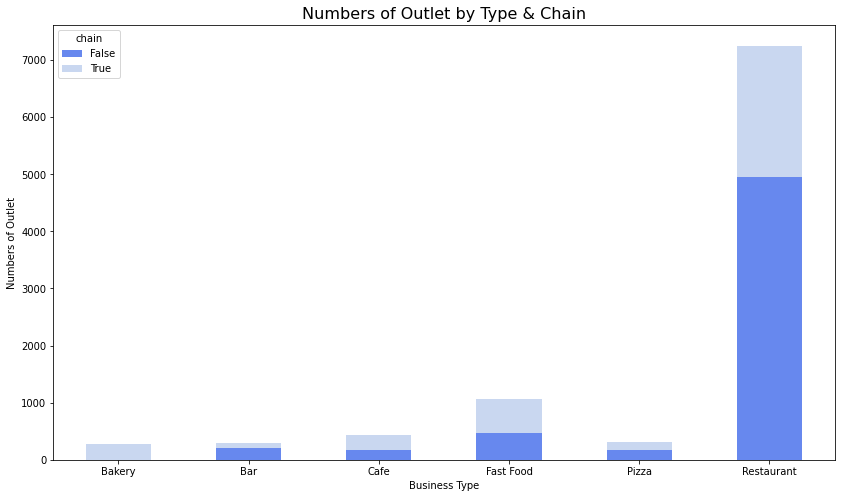

In [ ]:
chain_bus_type_2 = df_1.pivot_table(index='object_type', columns='chain', values='id', aggfunc='count')
chain_bus_type_2.fillna(0, inplace=True)
chain_bus_type_2.head()
chain_bus_type_2.plot(kind='bar', stacked=True, figsize=(14,8), color=['#6788ee', '#c9d7f0'])

plt.title('Numbers of Outlet by Type & Chain', fontsize=16)
plt.xlabel('Business Type')
plt.ylabel('Numbers of Outlet')
plt.xticks(rotation=0)

plt.show()

Meskipun secara jumlah lebih banyak `restaurant`, namun jika dilihat pada setiap `object_type` `Bakery` memiliki proporsi terbesar. Karena seluruh outlet `Bakery` berbasis `Chain`.

In [ ]:
df_1.loc[(df_1['object_type'] == 'Bakery') & (df['chain']==False)]

,id,object_name,address,chain,object_type,number


Saya memastikan kembali bahwa tidak ada outlet `Bakery` yang tidak berbasis `chain`. 

## Melihat Ciri-Ciri Usaha Berbasis Rantai

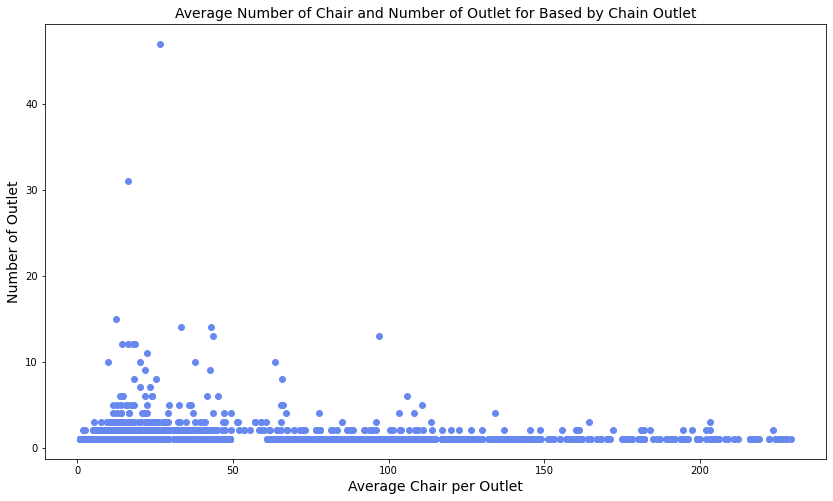

In [ ]:
df_1_chain = df_1.loc[df_1['chain'] == True].copy()
chain_outlet_chair = df_1_chain.groupby('object_name').agg({'id':'count','number':'mean'})
chain_outlet_chair.columns = ['outlet', 'chair']
chain_outlet_chair.head()

f = plt.figure()
f.set_figwidth(14)
f.set_figheight(8)

plt.scatter(chain_outlet_chair['chair'], chain_outlet_chair['outlet'], color='#6788ee')
plt.title('Average Number of Chair and Number of Outlet for Based by Chain Outlet', size=14)
plt.xlabel('Average Chair per Outlet', size=14)
plt.ylabel('Number of Outlet', size=14)
plt.show()

Meskipun statusnya usaha berbasis `chain`, namun sebagian besar jumlah outletnya dibawah 10 `outlet` namun dengan jumlah kursi yang cukup banyak. Pada tahap selanjutnya saya akan melihat distribusi jumlah outlet.Dari visualisasi diatas saya melihat variasi jumlah kursi per `outlet` lebih terdistribusi dibandingkan variasi jumlah `outlet`.


In [ ]:
chain_outlet_chair['outlet'].describe()

count    2733.000000
mean        1.345042
std         1.489055
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        47.000000
Name: outlet, dtype: float64

In [ ]:
np.percentile(chain_outlet_chair['outlet'], [90, 95, 99])

array([2., 3., 6.])

Setelah dilihat lebih detail, sebanyak `75%` bisnis hanyak memiliki 1 `outlet`. Jika dlihat dari persentilnya, hanya `10%` bisnis yang memiliki `outlet` lebih dari 1. Namun disparitas dari jumlah `outlet` cukup tinggi. Karena ada bisnis yang memiliki `outlet` hingga 47. Itu hanya terjadi pada kurang dari `1%` dari seluruh bisnis yang berbasis `chain`.

In [ ]:
chain_outlet_chair['chair'].describe()

count    2733.000000
mean       41.437569
std        44.313242
min         1.000000
25%        14.000000
50%        25.500000
75%        45.000000
max       229.000000
Name: chair, dtype: float64

Jika melihat outlet-outlet berbasis `chain` dari data jumlah kursinya, rata-rata outlet memiliki `41` kursi. Sedangkan paling sedikit `1` kursi dan paling banyak `229` kursi. Berdasarkan dari analisa data yang telah dilakukan sebelumnya, maka kecenderungan bisnis berbasis `chain` adalah memiliki beberapa tempat dengan jumlah kursi yang banyak. 

## Analisa Jumlah Kursi Untuk Setiap Jenis Outlet

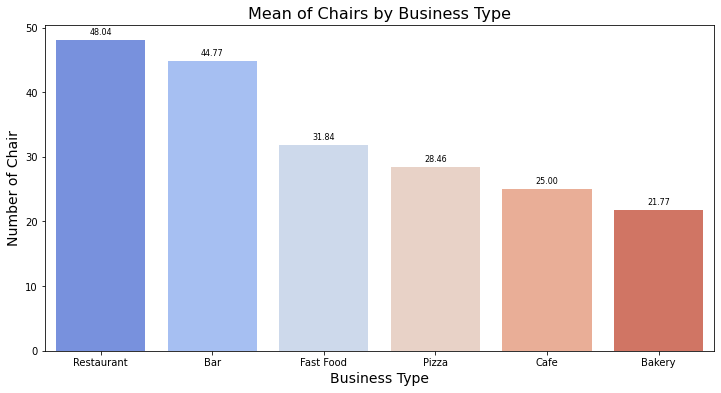

In [ ]:
bus_type_chair = df.groupby('object_type').agg({'number':'mean'}).reset_index()
bus_type_chair.columns = ['bus_type', 'chair']
bus_type_chair = bus_type_chair.sort_values(by='chair', ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
plots = sns.barplot(data = bus_type_chair, x='bus_type', y='chair', ax=ax, palette='coolwarm')

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
    
plt.title('Mean of Chairs by Business Type', size=16)
plt.xlabel('Business Type', size=14)
plt.ylabel('Number of Chair', size=14)
plt.show()

Dari grafik diatas menunjukan bahwa `restaurant` dan `bar` memiliki rata-rata kursi diatas `40` kursi. Sedangkan sisanya memiliki sekitar `30` hingga `20` kursi. Yang paling sedikit adalah `Bakery`, hal tersebut mungkin disebabkan karena jenis outlet `Bakery` pembeliannya lebih banyak `take away`. Sedangkan pada `Restaurant` dan `Bar` pengunjung lebih cenderung makan dan minum ditempat.

## 10 Nama Jalan dengan Outlet Terbanyak

Saya akan menganalisa 10 nama jalan yang memiliki jumlah outlet terbanyak. Oleh karena itu sebelum memulai analisanya, saya perlu memisahkan nama jalan dengan alamat. Karena itu saya akan memulai dengan membuat fungsi yang memisahkan nama jalan dari alamat.

In [ ]:
def get_street_name(txt):
  txt = pd.Series(txt.split(' '), name='text')

  start=0
  end=len(txt)-1

  for i in range(len(txt)):
    if i == 0:
      if txt[i].isnumeric():
        start = 1
    if i == 1:
      if txt[i] == '1/2':
        start = 2
      elif txt[i] == '1/4':
        start = 2
      elif txt[i] == '3/4':
        start = 2
      elif txt.isin(['ST', 'AVE', 'WAY', 'BLVD', 'AVENUE'])[i]:
        end=i
        return ' '.join(txt.loc[start:end])  
      elif i == end:
          return ' '.join(txt.loc[start:end])
    elif i > 1:
      if txt.isin(['ST', 'AVE', 'WAY', 'BLVD', 'AVENUE'])[i]:
        end=i
        return ' '.join(txt.loc[start:end])
      elif txt.isin(['STE', 'UNIT', 'unit', 'FL', 'A260', 'E13'])[i]:
        end=i-1
        return ' '.join(txt.loc[start:end])
      elif txt.str.contains('#')[i]:
        end=i-1
        return ' '.join(txt.loc[start:end])
      elif txt[i].isnumeric():
        end=i-1
        return ' '.join(txt.loc[start:end])
      elif txt.str.contains('-')[i]:
        end=i-1
        return ' '.join(txt.loc[start:end])
      elif i == end:
          return ' '.join(txt.loc[start:end])

In [ ]:
df['address'][1243]

'1102 LAWRENCE'

In [ ]:
get_street_name(df['address'][1243])

'LAWRENCE'

Formulanya telah diuji dan berhasil. Sekarang saatnya menerapkan pada seluruh dataset.

In [ ]:
df2 = df.copy()
df2['address'] = df2['address'].str.upper()
df2['street_name'] = df2['address'].apply(get_street_name)
df2.head()

,id,object_name,address,chain,object_type,number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE


kolom nama jalan telah berhasil ditambahkan kedalam dataset dengan nama `street_name`. Karena itu saya akan menghitung 10 nama jalan dengan outlet terbanyak.

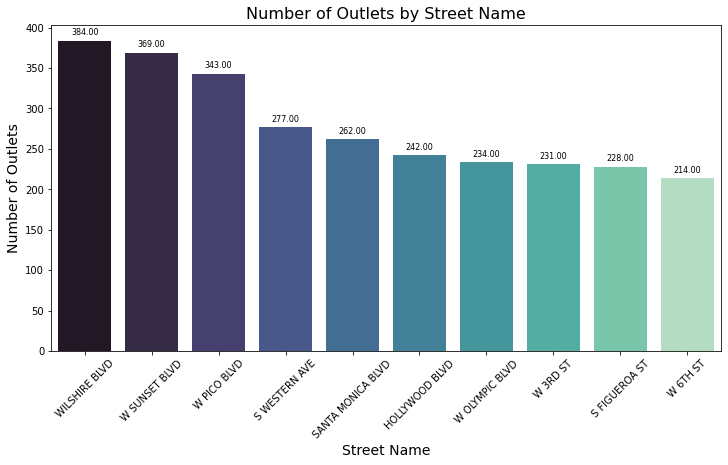

In [ ]:
outlet_count_by_street_name = df2.groupby('street_name').agg({'id':'count'}).reset_index()
outlet_count_by_street_name.columns = ['street_name', 'outlet_number']
outlet_count_by_street_name.sort_values(by='outlet_number', ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(12, 6))
plots = sns.barplot(data = outlet_count_by_street_name.head(10), x='street_name', y='outlet_number', ax=ax, palette='mako')

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=45)    
plt.title('Number of Outlets by Street Name', size=16)
plt.xlabel('Street Name', size=14)
plt.ylabel('Number of Outlets', size=14)
plt.show()

Dari 10 besar nama jalan dengan jumlah outlet terbanyak, ada jumlah terbanyaknya adalah `384` hingga yang paling sedikit `214`. Tiga besar nama jalan dengan outlet terbanyak adalah `WILSHIRE BLVD`, `W SUNSET BLVD`, dan `W PICO BLVD`. Ada lebih dari `300` outlet di masing-masing jalan tersebut.

## Jumlah Jalan yang Hanya Memiliki 1 Outlet 

In [ ]:
outlet_count_by_street_name.loc[outlet_count_by_street_name['outlet_number'] == 1].shape[0]

326

Ternyata ada 326 jalan yang hanya memiliki 1 outlet.

## Distribusi Jumlah Kursi dari Nama Jalan yang Memiliki Banyak Outlet

Pada tahap ini saya akan melihat distribusi dari jumlah kursi dari suatu jalan yang memiliki banyak outlet. Karena itu saya akan menganalisa distribusi jumlah kursi dari 3 jalan yang memiliki outlet terbanyak. Ketiga jalan tersebut adalah `WILSHIRE BLVD`, `W SUNSET BLVD`, dan `W PICO BLVD`. 

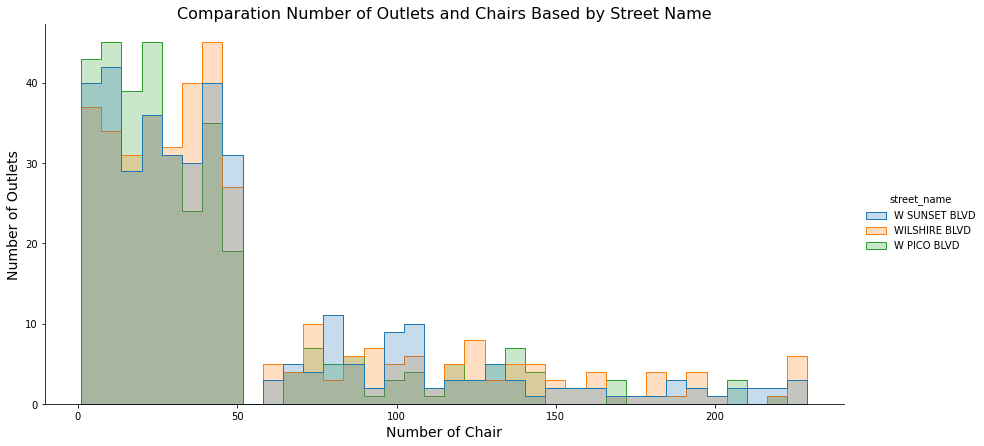

In [ ]:
 df2_big3_street = df2.loc[df2['street_name'].isin(['WILSHIRE BLVD', 'W SUNSET BLVD', 'W PICO BLVD'])]
 df2_big3_street['street_name'].unique()
 
 sns.displot(df2_big3_street, x='number', hue='street_name', element='step', height=6, aspect=2)

plt.title('Comparation Number of Outlets and Chairs Based by Street Name', size=16)
plt.xlabel('Number of Chair', size=14)
plt.ylabel('Number of Outlets', size=14)
plt.show()

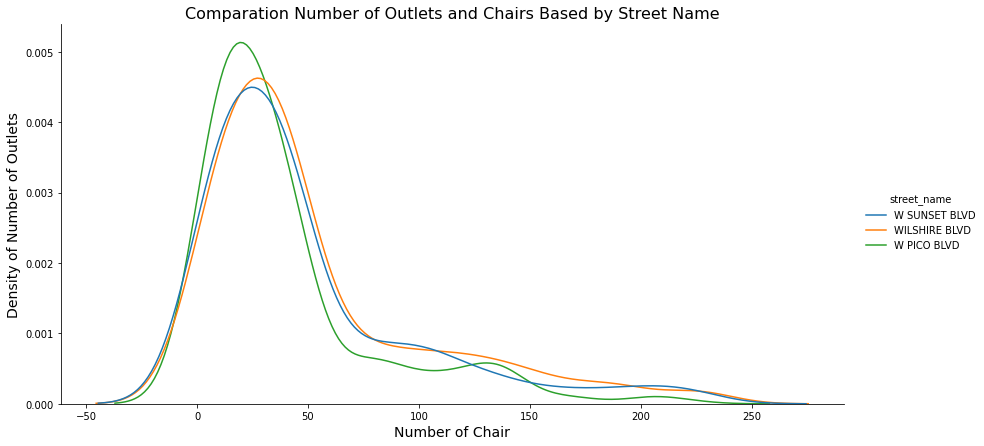

In [ ]:
sns.displot(df2_big3_street, x='number', hue='street_name', kind='kde', height=6, aspect=2)

plt.title('Comparation Number of Outlets and Chairs Based by Street Name', size=16)
plt.xlabel('Number of Chair', size=14)
plt.ylabel('Density of Number of Outlets', size=14)
plt.show()

Dari kedua grafik diatas dapat dilihat dari ketiga area tersebut memiliki kesamaan. Dari ketiga area tersebut dapat dilihat bahwa sebgaian besar outlet hanya memiliki kursi `50` kebawah. Pada kriteria outlet yang kursinya dibawah 50, area `W PICO BLVD` memiliki persentase jumlah outlet terbanyak, disusul oleh `WILSHIRE BLVD`, dan `W SUNSET BLVD`.

Setelah melewati `50` kursi, jumlah outlet menurun secara drastis. Pada kriteria outlet dengan jumlah kursi diatas `50`, area `WILSHIRE BLVD` terlihat memiliki persentase jumlah outlet sedikit lebih banyak dibandingkan area lainnya.  

In [ ]:
df2_big3_street['50_chair'] = df2_big3_street['number'] <= 50
table1 = df2_big3_street.pivot_table(values='id', index='street_name', columns='50_chair', aggfunc='count', margins=True)
table2 = table1.div(table1.iloc[:,-1], axis=0 )
table2

50_chair,False,True,All
street_name,,,
W PICO BLVD,0.180758,0.819242,1.0
W SUNSET BLVD,0.243902,0.756098,1.0
WILSHIRE BLVD,0.265625,0.734375,1.0
All,0.231752,0.768248,1.0


Secara umum pada ketiga area tersebut, lebih dari `75%` outlet jumlah kursinya dibawah 50. Data ini kurang lebih serupa serupa dengan yang didapat ketika menganalisa usaha berbasis rantai. Yang mana pesentil ke-75 nya adalah 45 kursi. Selain itu saya ingin melihat bagaimanakan proporsi jenis usaha pada outlet-outlet yang jumlah kursinya diatas `50`.

In [ ]:
fifty_chair_plus_type =  df2_big3_street.loc[~df2_big3_street['50_chair']].groupby('object_type').agg({'id':'count'}).reset_index()
fifty_chair_plus_type.columns = ['business_type', 'outlets_count']
fifty_chair_plus_type

,business_type,outlets_count
0,Bakery,1
1,Bar,8
2,Cafe,1
3,Fast Food,15
4,Pizza,3
5,Restaurant,226


In [ ]:
fig = go.Figure(
    data = [go.Pie(labels = fifty_chair_plus_type['business_type'], values = fifty_chair_plus_type['outlets_count'])]
)

fig.update_layout(
    title={
        'text':'Business Type Proportion for Outlet with More Than 50 Chairs at WILSHIRE BLVD, W SUNSET BLVD, & W PICO BLVD',
        'y':0.9,
        'x':0.5
    }
)

fig.show()

Ternyata hasilnya sebagian besar adalah `restaurant`. Hal ini sesuai dengan hasil analisa data jumlah kursi berdasarkan jenis usaha. Hal itu menunjukan `restaurant` adalah jenis usaha dengan rata-rata jumlah kursi terbanyak. Hal ini menguatkan bahwa `restaurant` cenderung memiliki jumlah kursi lebih banyak dibandingkan jenis usaha lainnya dan diikuti dengan jumlah outlet yang cukup banyak. 



# Kesimpulan

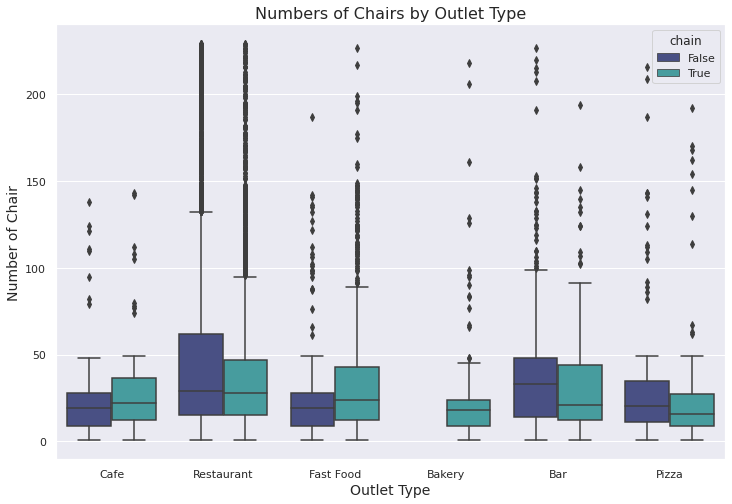

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(data=df_1, x='object_type', y='number', hue='chain', palette='mako')


plt.title('Numbers of Chairs by Outlet Type', size=16)
plt.xlabel('Outlet Type', size=14)
plt.ylabel('Number of Chair', size=14)
plt.show()

- `Restaurant` merupakan jenis usaha yang memiliki jumlah paling banyak dari segi jumlah `outlet` dan  jumlah kursi. Artinya permintaan akan `restaurant` sangatlah besar.

- `Bar` merupakan jenis usaha yang jumlah kursinya relatif lebih banyak dibanding jenis usaha lainnya, namun dari segi jumlah cabang sebaliknya. 

- `Fast Food` merupakan jenis usaha yang memiliki jumlah outlet terbanyak kedua dan rata-rata jumlah kursi terbanyak ketiga. Jenis usaha ini lebih outletnya lebih banyak berbasis `rantai`.

- Untuk outlet `Cafe`, `Bakery`, dan `Pizza` umumnya memiliki jumlah kursi 50 kebawah. Meskipun ada beberapa outlet yang memiliki kursi diatas 50 bahkan hingga sekitar 200, namun outlet tersebut jumlahnya relatif sedikit (`outlier`).

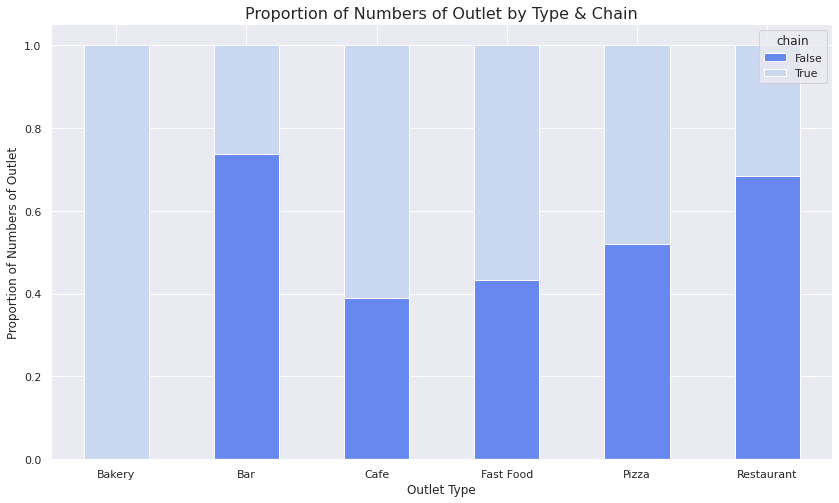

In [ ]:
table3 = df_1.pivot_table(index='object_type', columns='chain', values='id', aggfunc='count', margins=True).fillna(0)
table4 = table3.div(table3.iloc[:, -1], axis=0)
table4.drop(['All'], inplace=True)
table4.drop(columns='All', inplace=True)

table4.plot(kind='bar', stacked=True, figsize=(14,8), color=['#6788ee', '#c9d7f0'])

plt.title('Proportion of Numbers of Outlet by Type & Chain', fontsize=16)
plt.xlabel('Outlet Type')
plt.ylabel('Proportion of Numbers of Outlet')
plt.xticks(rotation=0)

plt.show()

Dari sudut pandang bisnis atau usaha berbasis `chain`, `Fast food`, `Pizza`, `Cafe`, dan `Bakery` proporsinya lebih banyak outlet yang berbasis `chain`. Sedangkan `Bar` dan `Restaurant` sebaliknya, proporsinya masih lebih sedikit `outlet` yang berbasis `chain`. 

Oleh karena itu, jika ingin mengembangkan usaha berbasis `chain` menurut saya ada baiknya berfokus pada `Bar` dan `Restaurant`. Karena masih belum didominasi oleh model bisnis berbasis `chain`. Jika ingin mengincar pasar yang luas dengan jumlah outlet yang banyak, maka `Restaurant` merupakan jenis usaha yang tepat. Sedangkan jika ingin mengincar pasar yang lebih `niche` dengan jumlah outlet yang tidak terlalu banyak, maka menurut saya `Bar` merupakan jenis usaha yang lebih sesuai.

Selain itu, kondisi pasar menurut saya juga perlu jadi pertimbangan. Jika jumlah outlet `Bar` atau `Restaurant` sudah mencukupi atau melebihi permintaan yang ada, maka ada baiknya dibandingkan membuat outlet baru lebih baik mengakusisi outlet lama yang tidak berbasis `chain` untuk dikembangkan. Perlu diperhatikan dalam mengakusisi harus melihat juga `outlet` lama yang akan diakusisi sudah memiliki basis pelanggan dan nama yang baik dimata pelanggan. Karena basis pelanggan dan nama baik tersebut akan membantu kedepannya dalam mengembangkan usaha berbasis `chain`.  

# Link Presentasi
Presentasi: [Link Presentasi](https://docs.google.com/presentation/d/1NvXFY--2LL6lxdF26Pt6CWYI7Hb9vmo3/edit?usp=share_link&ouid=113634708958590348463&rtpof=true&sd=true)